### 📘 Lesson 5: Modelling reserves on 4 second resolution data

<div style="display: flex; align-items: center; justify-content: space-between;">
  <div>
    <h3>Course presenters</h3>
    <ul>
      <li><strong>Priyesh Gosai</strong> - Energy Systems Modeler and Training Coordinator</li>
      <li><strong>Dr. Fabian Hofmann</strong> - Senior Optimization and Energy System Modelling Expert</li>
    </ul>
  </div>
  <div>
    <a href="https://openenergytransition.org/index.html">
      <img src="https://openenergytransition.org/assets/img/oet-logo-red-n-subtitle.png" height="60" alt="OET">
    </a>
  </div>
</div>


##### 🎯 Learning Objectives  



* Import a network. 
* Evaluate input data.
* Add reserve generators. 
* Inspect the results. 

---

#### 📥 **Importing Networks in PyPSA** 



PyPSA allows importing networks using three primary formats: **CSV**, **HDF5**, and **NetCDF**. Each format has its corresponding function.


**1️⃣ Importing a Network from CSV**

PyPSA can load networks stored in a directory containing CSV files. This is useful for human-readable and editable data.

```python
network.import_from_csv_folder("path_to_csv_directory")
```
**2️⃣ Importing a Network from HDF5**

HDF5 is a binary format that allows for fast loading and saving of networks.

```python
network = pypsa.Network("path_to_hdf5_file.h5")
```

**3️⃣ Importing a Network from NetCDF**

NetCDF is another binary format commonly used for scientific computing.

```python
network = pypsa.Network("path_to_netcdf_file.nc")
```


⤴️ **Shortcut**

Instead of using the `network.import_from_...("file_path/file_name.xxx")` function to import a network, you can simply add the path and file location in the Network function and PyPSA will select the appropriate method.


`network = pypsa.Network("file_path/file_name.xxx")`

#### **📝 Setting up a data import using a spreadsheet.**

In this example, a **simplified workflow** is demonstrated using an Excel spreadsheet. The **actual model** will implement a more **formal data processing** workflow, similar to the approach used in PyPSA-EUR/Earth.

* A spreadsheet has been developed that contains some of the main input data sources for a PyPSA model. 
* The spreadsheet is in `.xlsx` format can be opened in Microsoft Excel or Google Sheets. 
* A custom function is applied to convert the excel spreadsheet into a folder of csv files that can be uploaded into the PyPSA network. 
    * The function will create a folder containing the csv files that are imported into the network. 
    * This function will become obselete in the next version of PyPSA where an import function to import directly from Excel will be added to the default PyPSA functionality. See [PR #1159](https://github.com/PyPSA/PyPSA/pull/1159). 
    * The Excel file structure should work with the new update. 


---




**Levelised Costs**

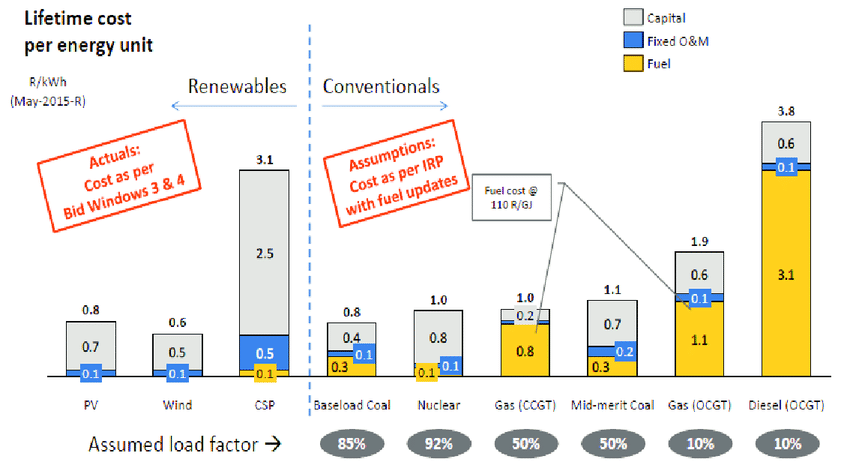

**Short Run Marginal Cost**

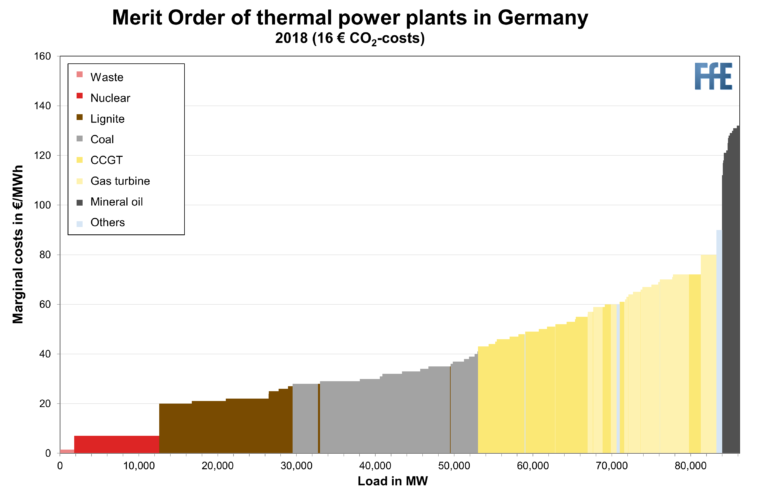

**Flexibility Requirements**

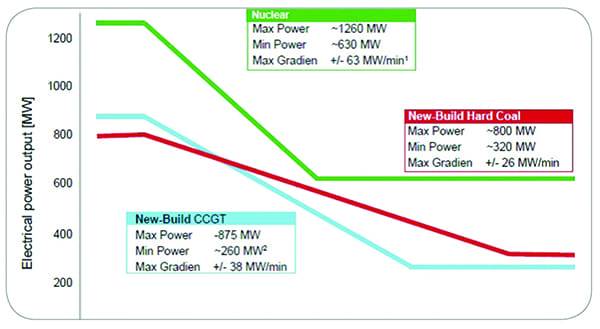

**Ramp Limits**

The `ramp_limit_up` and `ramp_limit_down` constraint is defined by the fraction of the units capacity that can be ramped in one time step. Therefore, the constraint must be set based on the time frequency in the snapshots. 

| Ramp Rate      | MW          | MW_pu       |
|----------------|-------------|-------------|
| MW/h           | 300         | 1           |
| MW/15min       | 75          | 0.25        |
| MW/min         | 5           | 0.0166 |
| MW/s           | 0.0833 | 0.00027 |
| MW/4s          | 0.3333 | 0.0011 |


**Coal Fired Power Plant Ramp Rates**

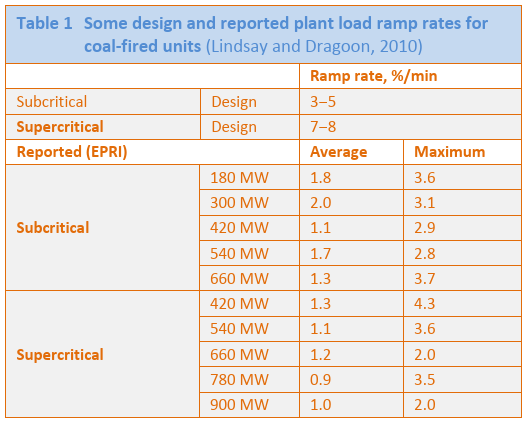

In [ ]:
# Google Colab users
# Remove the comments in the rows below to set up your notebook.

# from google.colab import drive
# import os

# drive.mount('/content/drive')
# os.chdir('/content/drive/MyDrive/psfo_2025/mec4131z/')

In [ ]:
# from colab_scripts import install_colab_dependencies
# install_colab_dependencies()

In [ ]:
import pypsa
import pandas as pd
import numpy as np
from training_scripts import *


In [ ]:
input_file_name = 'data/Lesson5_Reserves.xlsx'
path = convert_selected_sheets_to_csv(input_file_name, 'lesson5_csv_folder')
network = pypsa.Network(path)

Now analyse the model that has been set up without any reserves. 

* Add in reserves.
* Observe the effects of adding reserves. 
* How does, `ramp_limit_up/down` and `marginal_cost` affect the solution? 

In [ ]:
# Define your start and end times

start_time = pd.Timestamp("2023/09/18  00:00:00")
end_time = pd.Timestamp("2023/09/20  00:00:00")

# Update the snapshots attribute with the new time window
network.snapshots = network.snapshots[(network.snapshots >= start_time) & (network.snapshots <= end_time)]

In [ ]:
df_reference = network.loads_t.p_set["SA Load"].copy()
# Create a DataFrame using network.snapshots as the index.
# df = pd.read_excel("data/ZA_Frequency.xlsx",parse_dates="Timestamp",header = 0)
df = pd.read_excel("data/ZA_Frequency.xlsx", parse_dates=["Timestamp"], index_col="Timestamp", header=0)


network.loads_t.p_set["SA Load"] = network.loads_t.p_set["SA Load"] + (50-df["Hz"])/0.1*140

df_reference["Adjusted Load"] = network.loads_t.p_set["SA Load"]

NameError: name 'df' is not defined

In [ ]:
network.loads_t.p_set["SA Load"].plot()

In [ ]:
(network.loads_t.p_set["SA Load"]-df_reference).plot()

In [ ]:
network.generators_t.p_max_pu.plot()

In [ ]:
network.loads_t.p_set.plot()

In [ ]:
network.optimize()

In [ ]:
network.generators_t.p.plot(kind = 'area')

In [ ]:
network.generators_t.p['Loadshedding'].sum()/3600*4/24

In [ ]:
network.generators_t.p.describe()

In [ ]:
network.loads_t.p_set.plot()

In [ ]:
VRE = ['Solar','Wind']

(network.generators['p_nom'][VRE]*network.generators_t.p_max_pu[VRE] - network.generators_t.p[VRE]).plot()

# 

In [ ]:
network.statistics.curtailment()

In [ ]:
network.loads_t.p_set["SA Load"]

### 
---